<a href="https://colab.research.google.com/github/xiaomeng-ma/GitPractice/blob/master/Number_names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import tensorflow as tf
import matplotlib.pyplot as plt

from nltk.corpus import PlaintextCorpusReader
from nltk.corpus.reader import CHILDESCorpusReader
import numpy as np
import pandas as pd
from pandas import DataFrame
from nltk.probability import FreqDist
import string
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
from scipy import stats
import itertools

from scipy import optimize
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log as ln
import tensorflow_addons as tfa

import numpy
import math
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Embedding, TimeDistributed
from keras.layers import Conv1D,Conv2D, GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.initializers import Constant
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.ticker as ticker
from sklearn.model_selection import StratifiedKFold,train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import gensim


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-v9bhj79a
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-v9bhj79a
     |████████████████████████████████| 1.0MB 9.2MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0430fe3be375a1f3f6267b86300e1c0f1d79b2b26_-cp36-none-any.whl size=146357 sha256=b83c69b71d7f9896eddf09c205941a4db7002b9e6b591a417da7d82c4b20befd
  Stored in directory: /tmp/pip-ephem-wheel-cache-wyu_zsc4/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

#**Getting Train and Test Data** 
---



In [ ]:
pip install num2words

     |████████████████████████████████| 102kB 3.4MB/s 


In [ ]:
from num2words import num2words
language_list = ["en","de","es","fr","id","it","ja","ko","lt","lv","pl","ru","tr","th","vi"]

In [ ]:
import numpy as np
from numpy.random import RandomState
import numpy as np
import pandas as pd
from pandas import DataFrame
from nltk.probability import FreqDist
import string
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
from scipy import stats
import itertools

In [ ]:
def generate_train_numbers(seed, max_factor, k):
  train = RandomState(seed)
  trainsample = [list(range(0,101))]
  for i in range(2, max_factor):
    sample = train.randint((10**i)+1, 10**(i+1)-1, k)
    trainsample.append(sample)
  result = list(itertools.chain(*trainsample)) 
  return result
def generate_test_numbers(seed, max_factor, s, k):
  test = RandomState(seed)
  testsample = [list(test.randint(0, 100, s))]
  for i in range (2, max_factor):
    sample = list(test.randint((10**i)+1, 10**(i+1)-1, k))
    testsample.append(sample)
  result = list(itertools.chain(*testsample))
  return result

In [ ]:
def num_name_pair (language, train_data):
  num_pair = [language]
  for num in train_data:
    name = num2words(num, lang=language)
    num_pair.append(name)
  return num_pair

In [ ]:
small_size_name = []
small_size_num = generate_train_numbers(198, 7, 500)
for lng in language_list:
  nampair = num_name_pair(lng, small_size_num)
  small_size_name.append(nampair)

In [ ]:
big_size_name = []
big_size_num = generate_train_numbers(44, 7, 1000)
for lng in language_list:
  nampair = num_name_pair(lng, big_size_num)
  big_size_name.append(nampair)
  print(lng)

In [ ]:
test_name = []
test_num = generate_test_numbers(166, 7, 50 ,100)
for lng in language_list:
  nampair = num_name_pair(lng,test_num)
  test_name.append(nampair)

In [ ]:
test_name2 = []
test_num2 = generate_test_numbers(987, 7, 50 ,100)
for lng in language_list:
  nampair = num_name_pair(lng,test_num)
  test_name2.append(nampair)

In [ ]:
print('small size train:', len(small_size_name[9]),'big size train:', len(big_size_name[9]), 'test size:', len(test_name[9]))

small size train: 602 big size train: 5102 test size: 551


In [ ]:
def unit1 (i):
  ge = str(i)
  return ge
def unit2 (i):
  ge = i%10
  shi = i//10 *10
  return '|'. join([str(shi), '+', str(ge)])
def unit3 (i):
  bai = i//100
  shi = (i - bai*100)//10*10
  ge = i - bai*100 - shi
  sepk = '|'.join([str(bai), 'x', '100', '+', str(shi), '+', str(ge)])
  return sepk
def get_segment (train, alphabet):
  segmentlist = []
  for i in train:
    if i in alphabet:
      name = str(i)
      segmentlist.append([i, name])
    if i not in alphabet:
      if len(str(i)) == 2:
        name = unit2(i)
        segmentlist.append([i, name])
      if len(str(i)) == 3:
        name = unit3(i)
        segmentlist.append([i, name])
      if len(str(i)) == 4:
        ge = i//10**3
        u3 = i - ge*10**3
        name =  '|'.join([unit1(ge), 'x', '1000', '+', unit3(u3)])
        segmentlist.append([i,name])
      if len(str(i)) == 5:
        shi = i//10**3
        u3 = i - shi*10**3
        name = '|'.join([unit2(shi), 'x', '1000', '+', unit3(u3)])
        segmentlist.append([i,name])
      if len(str(i)) == 6:
        bai = i//10**3
        u3 = i - bai*10**3
        name = '|'.join([unit3(bai), 'x', '1000', '+', unit3(u3)])
        segmentlist.append([i,name])
      if len(str(i)) == 7:
        ge = i//10**6
        bai = (i - ge*10**6)//10**3
        u3 = i - ge*10**6 - bai*10**3
        name = '|'.join([unit1(ge), 'x', '$', '+', unit3(bai), 'x', '1000', '+', unit3(u3)])
        segmentlist.append([i,name])
  return segmentlist

In [ ]:
def get_df(number, segment, name):
  dfname = pd.DataFrame(name).T
  dfname.rename(columns = dfname.iloc[0], inplace = True)
  dfname.drop(dfname.index[0], inplace = True)
  dfname['number'] = number
  dfseg = pd.DataFrame(segment, columns = ['number', 'segment'])
  df = dfseg.merge(dfname, how = 'left', left_on = 'number', right_on = 'number')
  df['number'] = df['number'].astype(str)
  return df

In [ ]:
number_vocab = ['0','1','2','3','4','5','6','7','8','9','10','11','12',
'13','14','15','16','17','18','19','20','30','40','50',
'60','70','80','90','100','1000','1000000','']
segment_vocab = ['0','1','2','3','4','5','6','7','8','9','10','11','12',
'13','14','15','16','17','18','19','20','30','40','50',
'60','70','80','90','100','1000','$','x','+',' ']
big_size_segment = get_segment(big_size_num, number_vocab)
small_size_segment = get_segment(small_size_num, number_vocab)
test_segment = get_segment(test_num, number_vocab)
test_segment2 = get_segment(test_num2, number_vocab)

In [ ]:
df_small_train_name = pd.DataFrame(big_size_name).T
df_small_train_name.rename(columns=df_small_train_name.iloc[0], inplace = True)
df_small_train_name.drop(df_small_train_name.index[0], inplace = True)


In [ ]:
df_big_size = get_df(big_size_num, big_size_segment, big_size_name)
df_small_size = get_df(small_size_num, small_size_segment, small_size_name)
df_test = get_df(test_num, test_segment, test_name)
df_test2 = get_df(test_num2, test_segment2, test_name2)

In [ ]:
df_big_size.to_csv('5102big_size_train.csv')
df_small_size.to_csv('602small_size_train.csv')
df_test.to_csv('551test1.csv')
df_test2.to_csv('551test2.csv')

!cp '5102big_size_train.csv' "/content/drive/My Drive/Writing system"
!cp '602small_size_train.csv' "/content/drive/My Drive/Writing system"
!cp '551test1.csv' "/content/drive/My Drive/Writing system"
!cp '551test2.csv' "/content/drive/My Drive/Writing system"


# **Text Preprocess**
---



###**Number and Segment**


In [ ]:
def tokenized (num, seg, alp1, alp2):
  num_max_length = max([len(n) for n in num])
  seg_max_length = max([len(s) for s in seg])
  char_to_int1 = dict((c, i) for i,c in enumerate(alp1))
  char_to_int2 = dict((c, i) for i,c in enumerate(alp2))
  num_int = []
  seg_int = []
  num_pad = list()
  seg_pad = list()
  for n in num:
    strn = '|'.join(nn for nn in n )
    strn = ''.join(['|' for _ in range(num_max_length - len(n))]) + strn
    num_pad.append(strn)
  for s in seg:
    leng = len(s.split('|'))
    string = ''.join([' |' for _ in range(seg_max_length - leng)]) + s
    seg_pad.append(string)
  for pad1, pad2 in zip(num_pad, seg_pad):
    num_integer = [char_to_int1[char] for char in pad1.split('|')]
    seg_integer = [char_to_int2[char] for char in pad2.split('|')]
    num_int.append(num_integer)
    seg_int.append(seg_integer)
  tensornum = tf.convert_to_tensor(num_int, dtype=tf.int64)
  tensorseg = tf.convert_to_tensor(seg_int, dtype=tf.int64)
  return tensornum, tensorseg
def invert(tokenized, alphabet):
	int_to_char = dict((i, c) for i, c in enumerate(alphabet))
	strings = list()
	for pattern in tokenized:
		string = int_to_char[pattern]
		strings.append(string)
	return ''.join(strings)

In [ ]:
train_bs_num, train_bs_seg = tokenized(df_big_size['number'],df_big_size['segment'], number_vocab, segment_vocab )
train_ss_num, train_ss_seg = tokenized(df_small_size['number'],df_small_size['segment'], number_vocab, segment_vocab)

In [ ]:
test1_num, test1_seg = tokenized(df_test['number'], df_test['segment'], number_vocab, segment_vocab)
test2_num, test2_seg = tokenized(df_test2['number'], df_test2['segment'], number_vocab, segment_vocab)

In [ ]:
print('big size number shape:', train_bs_num.shape, 'big size segment shape:', train_bs_seg.shape)

big size number shape: (6295, 7) big size segment shape: (6295, 50)


In [ ]:
print('small size number shape:', train_ss_num.shape, 'small size segment shape:', train_ss_seg.shape)

small size number shape: (597, 7) small size segment shape: (597, 50)


In [ ]:
print('test number shape:', test1_num.shape, 'test segment shape:', test1_seg.shape)

test number shape: (593, 7) test segment shape: (593, 50)


###**Names in different languages**
en (English, default)
*ar (Arabic)*
cz (Czech)
de (German)
dk (Danish)
es (Spanish)
fi (Finnish)
fr (French)
he (Hebrew) (no million)
id (Indonesian)
it (Italian)
*ja (Japanese)*
kn (Kannada)
*ko (Korean)*
lt (Lithuanian)
lv (Latvian)
no (Norwegian)
pl (Polish)
pt (Portuguese)
sl (Slovene)
sr (Serbian)
ro (Romanian)
ru (Russian)
sl (Slovene)
tr (Turkish)
th (Thai)
vi (Vietnamese)
nl (Dutch)
uk (Ukrainian)

hundred, thousand, million: english, czech, german, danish, spanish, french,indonesian, lithuanian, latvian, polish, portuguese, turkish, russian, thai

bai, qian, wan, shi wan, bai wan: Japanese, Korean

tens + digit: english, Czech, Spanish ('y'), finish, french (et un), indonesian, italian, japanese, lituanian, latvian, norweigian (no space for tens, og for 0), polish, portugese ('y'), turkish, russian, thai

digit + tens: arabic, german ('und'), danish ('og'), slovene('in')

No space: japanese, korean, German, Danish, finish, italian, norweigian (no space under 100) slovenen(no space under 100), thai

In [ ]:
def get_language_data (data):
  lang_alpha = dict()
  language_name = dict()
  for l in language_list:
    alphabet = [' ']
    for i in number_vocab[0:-1]:
      letter = num2words(int(i), lang = l)
      alphabet.append(letter)
    lang_alpha.setdefault(l, alphabet)
    bs = data[l].values
    language_name.setdefault(l, bs)
  return lang_alpha, language_name

In [ ]:
bs_language_alphabet, bs_language_name = get_language_data(df_big_size)
ss_language_alphabet, ss_language_name = get_language_data(df_small_size)
test_language_alphabet, test_language_name = get_language_data(df_test)

In [ ]:
###the 10000 language
bs_language_alphabet['ja'].append('万')
bs_language_alphabet['ko'].append('만')
bs_language_alphabet['vi'].append('mười nghìn')

In [ ]:
#### adding 'and' language
bs_language_alphabet['en'].append('and')
bs_language_alphabet['fr'].append('et')
bs_language_alphabet['es'].append('y')
bs_language_alphabet['pt'].append('y')
bs_language_alphabet['ro'].append('și')

In [ ]:
bs_language_alphabet['fr'].append('y')
bs_language_alphabet['fr'].remove(' ')

In [ ]:
english_vocab = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen', 'twenty', 'thirty', 'forty', 'fifty', 'sixty', 'seventy', 'eighty', 'ninety', 'hundred', 'thousand', 'million', 'and']
english_bs = bs_language_name['en']
english_ss = ss_language_name['en']
english_test1 = test_language_name['en']
english_test2 = get_language_data(df_test2)[1]['en']

In [ ]:
english_test2 = get_language_data(df_test2)[1]['en']

In [ ]:
def clean_name(name, spl):
  list1 = []
  for i in name:
    ilist = re.split(spl, i)
    kk = [ii for ii in ilist if ii]
    list1.append(kk)
  return list1
def language_dict(vocab):
  char_to_int = dict((c,i+3) for i,c in enumerate(vocab))
  char_to_int['<PAD>'] = 0
  char_to_int['<S>'] = 1
  char_to_int['<E>'] = 2
  char_to_int_invert = {v:k for k, v in char_to_int.items()}
  return char_to_int, char_to_int_invert 
def encode (namelist, dictionary):
  maxlen = max(len(i) for i in namelist)
  encode_tokens = [['<S>'] + ['<PAD>'] * (maxlen - len(token)) + token + ['<E>'] for token in namelist]
  encode_input = [list(map(lambda x: dictionary[x], token)) for token in encode_tokens]
  return encode_input

In [ ]:
def decode (namelist, dictionary):
  maxlen = max(len(i) for i in namelist)
  decode_tokens = [['<S>'] + ['<PAD>'] * (maxlen - len(token)) + token + ['<E>'] for token in namelist]
  output_tokens = [['<PAD>'] * (maxlen - len(token)+1) + token + ['<E>'] for token in namelist]
  decode_input = [list(map(lambda x: dictionary[x], token)) for token in decode_tokens]
  decode_output = [list(map(lambda x: [dictionary[x]], token)) for token in output_tokens]
  return decode_input, decode_output

In [ ]:
ssss = df_test2['segment'].values

In [ ]:
clean_name(ssss, '\\|')

In [ ]:
df_test2['segment'][489].split('|')

In [ ]:
segment_dict, segment_dict_inver = language_dict(segment_vocab)
segment_encode_input_bs = encode(clean_name(df_big_size['segment'].values,'\\|'), segment_dict)
segment_encode_input_ss = encode(clean_name(df_small_size['segment'].values,'\\|'), segment_dict)
segment_test1_encode_input = encode(clean_name(df_test['segment'].values,'\\|'), segment_dict)
segment_test2_encode_input = encode(clean_name(df_test2['segment'].values,'\\|'), segment_dict)


In [ ]:
english_dict, english_dict_inver = language_dict(english_vocab)
english_decode_input_bs, english_decode_output_bs = decode(clean_name(english_bs, '\s|-|,'), english_dict)
english_decode_input_ss, english_decode_output_ss = decode(clean_name(english_ss, '\s|-|,'), english_dict)
english_decode_input_test1, english_decode_output_test1 = decode(clean_name(english_test1, '\s|-|,'), english_dict)
english_decode_input_test2, english_decode_output_test2 = decode(clean_name(english_test2, '\s|-|,'), english_dict)


In [ ]:
english_train_ss = encode(clean_name(english_ss, '\s|-|,'))
english_test_data1 = encode(clean_name(english_test1, '\s|-|,'))
english_test_data2 = encode(clean_name(english_test2, '\s|-|,'))

In [ ]:
char_to_int = dict((c,i+3) for i,c in enumerate(english_vocab))
char_to_int['<PAD>'] = 0
char_to_int['<S>'] = 1
char_to_int['<E>'] = 2
char_to_int

In [ ]:
char_to_int_invert = {v:k for k, v in char_to_int.items()}

In [ ]:
char_to_int_invert[0]

'<PAD>'

In [ ]:
encode_tokens

In [ ]:
maxlen = max(len(i) for i in englist1)
encode_tokens = [['<S>'] + ['<PAD>'] * (maxlen - len(token)) + token + ['<E>'] for token in englist1]


In [ ]:
encode_input

In [ ]:
encode_input = [list(map(lambda x: char_to_int[x], token)) for token in encode_tokens]
encode_input

In [ ]:
def space_tokenize(alphabet, name):
  token = tf.keras.preprocessing.text.Tokenizer(split = ' ', char_level= False)
  token.fit_on_texts(alphabet)
  seq = token.texts_to_sequences(name)
  pad_seq = tf.keras.preprocessing.sequence.pad_sequences(seq, padding = 'pre')
  tensorseg = tf.convert_to_tensor(pad_seq, dtype=tf.int64)
  return tensorseg
def nospace_tokenize(alphabet, name):
  t = tf.keras.preprocessing.text.Tokenizer(char_level= True)
  t.fit_on_texts(alphabet)
  seq = t.texts_to_sequences(name)
  pad_seq = tf.keras.preprocessing.sequence.pad_sequences(seq, padding = 'pre')
  tensorseg = tf.convert_to_tensor(pad_seq, dtype=tf.int64)
  return tensorseg

In [ ]:
token = tf.keras.preprocessing.text.Tokenizer(filters = '-', split = ' ', char_level=False)
token.fit_on_texts(bs_language_alphabet['en'])
seq = token.texts_to_sequences(df_big_size['en'].values)
tf.keras.preprocessing.sequence.pad_sequences(seq, padding = 'pre', value = )

array([[99, 99, 99, ..., 99, 99, 11],
       [99, 99, 99, ..., 99, 99, 12],
       [99, 99, 99, ..., 99, 99, 13],
       ...,
       [10,  8, 29, ..., 32, 24,  7],
       [ 8,  4, 29, ..., 32, 22,  4],
       [99,  4,  3, ..., 32, 21,  8]], dtype=int32)

In [ ]:
bs_language_alphabet['en'].append('-')

In [ ]:
space = ['en', 'cz', 'fr', 'es', 'id', 'lt', 'lv', 'pl', 'pt', 'ru', 'tr', 'vi', 'ro']
nspace = ['de', 'ko', 'ja', 'fi', 'it', 'no', 'sl', 'th']
bs_name_list = dict()
for sp_l in space:
  name = space_tokenize(bs_language_alphabet[sp_l], bs_language_name[sp_l])
  bs_name_list.setdefault(sp_l, name)
for nsp_l in nspace:
  name = nospace_tokenize(bs_language_alphabet[nsp_l], bs_language_name[nsp_l])
  bs_name_list.update({nsp_l: name})

In [ ]:
ss_name_list = dict()
for sp_l in space:
  name = space_tokenize(ss_language_alphabet[sp_l], ss_langauge_name[sp_l])
  ss_name_list.setdefault(sp_l, name)
for nsp_l in nspace:
  name = nospace_tokenize(ss_language_alphabet[nsp_l], ss_langauge_name[nsp_l])
  ss_name_list.update({nsp_l: name})

In [ ]:
test_name_list = dict()
for sp_l in space:
  name = space_tokenize(test_language_alphabet[sp_l], test_language_name[sp_l])
  test_name_list.setdefault(sp_l, name)
for nsp_l in nspace:
  name = nospace_tokenize(test_language_alphabet[nsp_l], test_language_name[nsp_l])
  test_name_list.update({nsp_l: name})

In [ ]:
test_name_list['no']

<tf.Tensor: shape=(593, 65), dtype=int64, numpy=
array([[ 8,  2, 11, ...,  0,  0,  0],
       [ 3,  4,  1, ...,  0,  0,  0],
       [16,  1,  1, ...,  0,  0,  0],
       ...,
       [ 3,  4, 15, ...,  0,  0,  0],
       [ 1,  7,  2, ...,  3,  0,  0],
       [ 5, 13, 14, ...,  3,  4,  0]])>

In [ ]:
train_bs_num

<tf.Tensor: shape=(2899, 7), dtype=int64, numpy=
array([[31, 31, 31, ..., 31,  1,  0],
       [31, 31, 31, ..., 31,  1,  1],
       [31, 31, 31, ..., 31,  1,  2],
       ...,
       [ 9,  7,  6, ...,  6,  5,  6],
       [ 7,  3,  6, ...,  3,  3,  3],
       [ 3,  2,  1, ...,  9,  2,  7]])>

In [ ]:
bs_name_list['en']

<tf.Tensor: shape=(2899, 13), dtype=int64, numpy=
array([[11,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [13,  0,  0, ...,  0,  0,  0],
       ...,
       [10, 31,  8, ..., 32, 24,  7],
       [ 8, 31,  4, ..., 32, 22,  4],
       [ 4, 31,  3, ..., 21,  8,  0]])>

#**Model Buidling**

##Step 1. NUMBER TO SEGMENT
456 = 400 + 50 + 6

input 456

output 400|+|50|+|6

In [ ]:
!pip install git+https://github.com/CyberZHG/keras-transformer.git

In [ ]:
import keras_transformer
from keras_transformer import get_model

In [ ]:
def readable_inverse (prediction, alphabet):
  readinver = []
  inver = []
  for i in prediction:
    firs = []
    for k in i:
      num = np.argmax(k)
      firs.append(num)
      readable = invert(firs, alphabet)
    readinver.append(readable)
    inver.append(firs)
  return inver, readinver
  

In [ ]:
np.asarray(english_train_bs).shape

(6295, 15)

In [ ]:
np.asarray(segment_train_bs).shape

(6295, 23)

In [ ]:
model = get_model(token_num=max(len(number_vocab), len(segment_vocab)),
                  embed_dim=32, encoder_num=8, decoder_num=4, head_num=8, 
                  hidden_dim=128, attention_activation = 'relu', feed_forward_activation = 'relu',
                  dropout_rate=0.05, use_same_embed=False)
model.compile('adam', 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

In [ ]:
train_bs_english = 

In [ ]:
train_ss_num = tf.random.shuffle(train_ss_num, seed = 68)
train_ss_seg = tf.random.shuffle(train_ss_seg, seed = 68)
test1_num = tf.random.shuffle(test1_num, seed = 68)
test2_num = tf.random.shuffle(test2_num, seed = 68)
test1_seg = tf.random.shuffle(test1_seg, seed = 68)
test2_seg = tf.random.shuffle(test2_seg, seed = 68)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)
history = model.fit(x=[np.asarray(train_ss_num), np.asarray(train_ss_seg)],
    y= np.asarray(train_ss_seg),
    epochs=50,
    validation_split = 0.1,
    batch_size = 64,
    verbose = 1,
    callbacks=[callback])


Text(0.5, 1.0, 'Small-size Number to Segment')

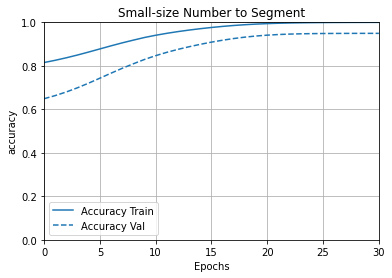

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Accuracy': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy')
plt.title('Small-size Number to Segment')

In [ ]:
### encode_input -- big_size_number
### decode_input --- big_size_segment
### decode_output --- big_size_segment

In [ ]:
scores1 = model.evaluate(x=[np.asarray(test1_num), np.asarray(test1_seg)],
    y= np.asarray(test1_seg), verbose = 2)

19/19 - 1s - loss: 0.0121 - accuracy: 1.0000


In [ ]:
scores2 = model.evaluate(x= [np.asarray(test2_num), np.asarray(test2_seg)],
                         y = np.asarray(test2_seg), verbose = 2)

19/19 - 1s - loss: 0.0122 - accuracy: 1.0000


In [ ]:
### test1 and big_size number overlap 84 
### size test 1: 593
### size big size 2902
y_pred1 = model.predict(x = [np.asarray(test1_num), np.asarray(test1_seg)])
test_segment_result1, test_segment1 = readable_inverse(y_pred1, segment_vocab)


In [ ]:
test_segment_result1, test_segment1 = readable_inverse(y_pred1, segment_vocab)
test_segment_result2, test_segment2 = readable_inverse(y_pred2, segment_vocab)

In [ ]:
y_pred2 = model.predict(x = [np.asarray(test2_num), np.asarray(test2_seg)])
test_segment_result2, test_segment2 = readable_inverse(y_pred2, segment_vocab)

In [ ]:
test_segment1[0]

'                                 1x100+30+7x1000+5x100+40+8'

Step 2. Segment to Name

In [ ]:
### encode_input -- big_size_number
### decode_input --- big_size_name (english, german, japanese, indonesian)
### decode_output --- big_size_name (english, german, japanese, indonesian)

x_eng = [np.asarray(train_bs_seg), np.asarray(train_n_list['en'])]
x_deu = [np.asarray(train_bs_seg), np.asarray(bs_name_list['de'])]
x_jpn = [np.asarray(train_bs_seg), np.asarray(bs_name_list['ja'])]
x_ind = [np.asarray(train_bs_seg), np.asarray(bs_name_list['id'])]

In [ ]:
model = get_model(token_num=50,
                  embed_dim=32, encoder_num=8, decoder_num=8, head_num=8, 
                  hidden_dim=128, attention_activation = 'relu', feed_forward_activation = 'relu',
                  dropout_rate=0.05, use_same_embed=False)
model.compile('adam', 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

In [ ]:
eng_decode_input_bs = tf.random.shuffle(english_decode_input_bs)
eng_decode_output_bs =tf.random.shuffle(english_decode_output_bs)

In [ ]:
english_decode_input_test1 

In [ ]:
eng_decode_output_bs.shape

TensorShape([6295, 15, 1])

In [ ]:
eng_decode_input_bs.shape

TensorShape([6295, 15])

In [ ]:
print(train_bs_eng.shape, train_bs_segment2.shape, test1_eng.shape, test2_eng.shape)

(6295, 15) (6295, 23) (593, 15) (584, 15)


In [ ]:
history_eng = model.fit(x=[np.asarray(train_bs_segment2), np.asarray(eng_decode_input_bs)], 
                        y=np.asarray(eng_decode_input_bs), 
                        batch_size=32, 
                        epochs=50, callbacks=[callback], validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


158/158 [==============================] - 44s 278ms/step - loss: 0.6592 - accuracy: 0.6335 - val_loss: 0.4020 - val_accuracy: 0.7494
Epoch 2/50
158/158 [==============================] - 36s 226ms/step - loss: 0.2338 - accuracy: 0.8960 - val_loss: 0.0831 - val_accuracy: 0.9767
Epoch 3/50
158/158 [==============================] - 36s 225ms/step - loss: 0.0510 - accuracy: 0.9848 - val_loss: 0.0245 - val_accuracy: 0.9942
Epoch 4/50
158/158 [==============================] - 36s 226ms/step - loss: 0.0211 - accuracy: 0.9949 - val_loss: 0.0114 - val_accuracy: 0.9973
Epoch 5/50
158/158 [==============================] - 35s 224ms/step - loss: 0.0103 - accuracy: 0.9986 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 6/50
158/158 [==============================] - 36s 226ms/step - loss: 0.0053 - accuracy: 0.9999 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 7/50
158/158 [==============================] - 36s 225ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0

Text(0.5, 1.0, 'English train')

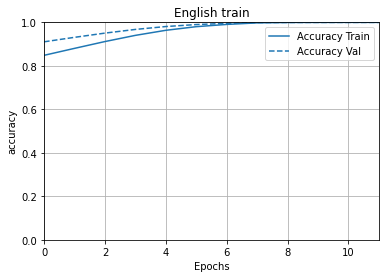

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Accuracy': history_eng}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy')
plt.title('English train')

In [ ]:
history_deu = model.fit(x_deu, x_deu[1], batch_size=32, epochs=50, callbacks=[callback], validation_split=0.2)

In [ ]:
scores_deu = model.evaluate(x = [np.asarray(test_seg), test_deu], y = test_deu, verbose = 2)

19/19 - 1s - loss: 0.0496 - accuracy: 0.9827


In [ ]:
test_eng

In [ ]:
scores_eng = model.evaluate(x=[np.asarray(segment_test1_encode_input), np.asarray(english_decode_input_test1)],
    y= np.asarray(english_decode_output_test1), verbose = 2)

19/19 - 1s - loss: 0.7728 - accuracy: 0.8918


In [ ]:
from keras_transformer import decode
decoded = decode(
    model,
    segment_test1_encode_input,
    start_token = english_dict['<S>'],
    end_token = english_dict['<E>'],
    pad_token = english_dict['<PAD>'],
    top_k = 10,
)
print(' '.join(map(lambda x:english_dict_inver[x], decoded[0][1:-1])))

two <PAD> two six seven hundred <PAD> two <PAD> <PAD> hundred six thirty eight


In [ ]:
segment_test_data1[0]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 35, 10, 2]

In [ ]:
for i in decoded:
  print(''.join(map(lambda x:english_dict_inver[x], i[1:-1])))

In [ ]:

y_pred_eng = model.predict(x=[np.asarray(test_seg), np.asarray(test_eng)])
eng_test_result, eng_test_result_seg = readable_inverse(y_pred_eng, bs_language_alphabet['en'])

In [ ]:
np.argmax(y_pred_eng[0][0])

6

In [ ]:
eng_test_result_seg

In [ ]:
scores = model.evaluate( x = [np.asarray(test_seg), test_ind], y = test_ind)

19/19 [==============================] - 1s 29ms/step - loss: 0.0023 - accuracy: 1.0000


In [ ]:
bs_language_alphabet['id'].append(' ')
y_pred_ind = model.predict(x=[np.asarray(test_seg), np.asarray(test_ind)])
ind_test_segment_result, ind_test_segment_readable_result = readable_inverse(y_pred_ind, bs_language_alphabet['id'])

In [ ]:
df_test['id']

In [ ]:
ind_test_segment_readable_result

In [ ]:
y_pred = model.predict(x=[np.asarray(test_seg), test_eng])
test_segment_result, test_segment_readable_result = readable_inverse(y_pred, bs_language_alphabet['en'])

In [ ]:
train_bs_seg

<tf.Tensor: shape=(2899, 50), dtype=int64, numpy=
array([[33, 33, 33, ..., 10, 32,  0],
       [33, 33, 33, ..., 10, 32,  1],
       [33, 33, 33, ..., 10, 32,  2],
       ...,
       [33, 33, 33, ..., 23, 32,  6],
       [33, 33, 33, ..., 21, 32,  3],
       [33, 33, 33, ..., 20, 32,  7]])>

In [ ]:
train_bs_num

<tf.Tensor: shape=(2899, 7), dtype=int64, numpy=
array([[31, 31, 31, ..., 31,  1,  0],
       [31, 31, 31, ..., 31,  1,  1],
       [31, 31, 31, ..., 31,  1,  2],
       ...,
       [ 9,  7,  6, ...,  6,  5,  6],
       [ 7,  3,  6, ...,  3,  3,  3],
       [ 3,  2,  1, ...,  9,  2,  7]])>

In [ ]:
bs_name_list['en']

<tf.Tensor: shape=(2899, 13), dtype=int64, numpy=
array([[11,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [13,  0,  0, ...,  0,  0,  0],
       ...,
       [10, 31,  8, ..., 32, 24,  7],
       [ 8, 31,  4, ..., 32, 22,  4],
       [ 4, 31,  3, ..., 21,  8,  0]])>

In [ ]:
np.argmax(y_pred[0][1])

8

In [ ]:
np.argmax(y_pred[0][2])

15

In [ ]:
test_eng[7]

array([26,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
test_segment_result

ValueError: ignored

In [ ]:
bs_language_alphabet['en'].append(' ')

In [ ]:
for i,j in zip(test_segment_result,test_eng):
  

array([[24,  8,  0, ...,  0,  0,  0],
       [28,  4,  0, ...,  0,  0,  0],
       [27,  1,  0, ...,  0,  0,  0],
       ...,
       [10, 31, 26, ...,  0,  0,  0],
       [ 4, 31,  7, ..., 29, 25,  1],
       [ 8, 31,  4, ..., 29, 22, 10]])

In [ ]:
test_segment_result

In [ ]:
df_test['number']

0           57
1           93
2           81
3           76
4           76
        ...   
588    4431517
589    7675989
590    9070634
591    3657461
592    7366439
Name: number, Length: 593, dtype: object

In [ ]:
df_test['en']

0                                            fifty-seven
1                                           ninety-three
2                                             eighty-one
3                                            seventy-six
4                                            seventy-six
                             ...                        
588    four million, four hundred and thirty-one thou...
589    seven million, six hundred and seventy-five th...
590    nine million, seventy thousand, six hundred an...
591    three million, six hundred and fifty-seven tho...
592    seven million, three hundred and sixty-six tho...
Name: en, Length: 593, dtype: object

In [ ]:
test_segment_readable_result[46]

'ninety seven sixteen sixteen sixteen sixteen sixteen sixteen sixteen sixteen sixteen'

In [ ]:
test_segment_result, test_segment_readable_result = readable_inverse(y_pred, bs_language_alphabet['en'])
test_segment_readable_result

In [ ]:
source_tokens = [
    'i need more power'.split(' '),
    'eat jujube and pill'.split(' '),
]
target_tokens = [
    list('我要更多的抛瓦'),
    list('吃枣💊'),
]

# Generate dictionaries
def build_token_dict(token_list):
    token_dict = {
        '<PAD>': 0,
        '<START>': 1,
        '<END>': 2,
    }
    for tokens in token_list:
        for token in tokens:
            if token not in token_dict:
                token_dict[token] = len(token_dict)
    return token_dict

source_token_dict = build_token_dict(source_tokens)
target_token_dict = build_token_dict(target_tokens)
target_token_dict_inv = {v: k for k, v in target_token_dict.items()}

# Add special tokens
encode_tokens = [['<START>'] + tokens + ['<END>'] for tokens in source_tokens]
decode_tokens = [['<START>'] + tokens + ['<END>'] for tokens in target_tokens]
output_tokens = [tokens + ['<END>', '<PAD>'] for tokens in target_tokens]

In [ ]:
encode_tokens

[['<START>', 'i', 'need', 'more', 'power', '<END>'],
 ['<START>', 'eat', 'jujube', 'and', 'pill', '<END>']]

In [ ]:
decode_tokens

[['<START>', '我', '要', '更', '多', '的', '抛', '瓦', '<END>'],
 ['<START>', '吃', '枣', '💊', '<END>']]

In [ ]:
output_tokens

[['我', '要', '更', '多', '的', '抛', '瓦', '<END>', '<PAD>'],
 ['吃', '枣', '💊', '<END>', '<PAD>']]

In [ ]:
source_max_len = max(map(len, encode_tokens))
target_max_len = max(map(len, decode_tokens))

encode_tokens = [tokens + ['<PAD>'] * (source_max_len - len(tokens)) for tokens in encode_tokens]
decode_tokens = [tokens + ['<PAD>'] * (target_max_len - len(tokens)) for tokens in decode_tokens]
output_tokens = [tokens + ['<PAD>'] * (target_max_len - len(tokens)) for tokens in output_tokens]

encode_input = [list(map(lambda x: source_token_dict[x], tokens)) for tokens in encode_tokens]
decode_input = [list(map(lambda x: target_token_dict[x], tokens)) for tokens in decode_tokens]
decode_output = [list(map(lambda x: [target_token_dict[x]], tokens)) for tokens in output_tokens]

In [ ]:
encode_input

[[1, 3, 4, 5, 6, 2], [1, 7, 8, 9, 10, 2]]

In [ ]:
decode_input

[[1, 3, 4, 5, 6, 7, 8, 9, 2], [1, 10, 11, 12, 2, 0, 0, 0, 0]]

In [ ]:
decode_output

[[[3], [4], [5], [6], [7], [8], [9], [2], [0]],
 [[10], [11], [12], [2], [0], [0], [0], [0], [0]]]

In [ ]:
english_decode_input_test1[:10]

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 10, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 6, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 4, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 9, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 9, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 9, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 11, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 9, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 9, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 9, 2]]

In [ ]:
english_decode_output_test[:10]

NameError: ignored